In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import storage
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gcsfs
import json
import firecloud.api
from glob import glob
import dalmatian as dm
import pandas as pd

In [3]:
align_res = []
for align in glob("*alignment*"):
    align_res.append(pd.read_table(align, skiprows=6).loc[:, ['PF_HQ_ALIGNED_READS']])
align_res = pd.concat(align_res, axis=1)   
align_res.columns = list(map(lambda x:x.split('.')[0], glob("*alignment*")))

In [4]:
#wm = dm.WorkspaceManager("broad-genomics-data/DepMap_WGS")
wm = dm.WorkspaceManager("broad-firecloud-ccle/DepMap_WES_CN_hg38")
allstat = wm.get_samples()

In [5]:
for col in allstat.columns:
    if 'bam' in col:
        print(col)

analysis_ready_bam_md5
analysis_ready_bam_md5_alt
hg19_bam_filepath
hg38_analysis_ready_bam
hg38_analysis_ready_bam_index
hg38_analysis_ready_bam_md5
internal_bam_filepath
internal_bam_filepath_alt
legacy_bam_filepath
mutect2_bamout
mutect2_bamout_index
mutect2_with_germline_bamout
mutect2_with_germline_bamout_index
normal_bam_alignment_summary_metrics
normal_bam_bait_bias_detail_metrics
normal_bam_bait_bias_summary_metrics
normal_bam_bam_validation
normal_bam_base_distribution_by_cycle
normal_bam_base_distribution_by_cycle_metrics
normal_bam_converted_oxog_metrics
normal_bam_gc_bias
normal_bam_gc_bias_detail_metrics
normal_bam_gc_bias_summary_metrics
normal_bam_hybrid_selection_metrics
normal_bam_insert_size_histogram
normal_bam_insert_size_metrics
normal_bam_lane_list
normal_bam_pre_adapter_detail_metrics
normal_bam_pre_adapter_summary_metrics
normal_bam_quality_by_cycle
normal_bam_quality_by_cycle_metrics
normal_bam_quality_distribution
normal_bam_quality_distribution_metrics
normal

In [6]:
allstat_use = allstat.loc[:, ['internal_bam_filepath', 'internal_bam_filepath_alt','source', 'sex', 'primary_disease', 'tumor_bam_alignment_summary_metrics']]

In [7]:
allstat_use.loc[allstat_use.loc[:,'tumor_bam_alignment_summary_metrics'].isnull(), :]['source'].value_counts()

CCLF      169
DEPMAP      1
NA          1
Name: source, dtype: int64

In [8]:
for alt in allstat_use['internal_bam_filepath'].dropna():
    print(alt)
    break

gs://cclebams/hg38_wes/CDS-00rz9N.hg38.bam


In [9]:
allstat_use.loc[allstat_use.loc[:,'tumor_bam_alignment_summary_metrics'].isnull(), :].to_csv("CCLF.bam_list")

In [10]:
cclf_bams = allstat_use.loc[allstat_use.loc[:,'tumor_bam_alignment_summary_metrics'].isnull(), ['internal_bam_filepath_alt', 'internal_bam_filepath']]

In [11]:
cclf_bams.head()

,internal_bam_filepath_alt,internal_bam_filepath
sample_id,,
CDS-1aJRXx,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bam
CDS-1Kp9PS,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bam
CDS-243Iiz,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bam
CDS-25UYkM,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bam
CDS-2L53g5,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bam


In [12]:
cclf_bams = pd.DataFrame(cclf_bams)
cclf_bams.loc[:, 'bai'] = cclf_bams.internal_bam_filepath_alt.str.replace(".bam", ".bai", regex=False)

In [13]:
cclf_bams.loc[:, 'no_alt_bai'] = cclf_bams.internal_bam_filepath.str.replace(".bam", ".bai", regex=False)

In [14]:
cclf_bams.loc[["CDS-VNR5t7", "CDS-CYVPOD", "CDS-aSwDFc"]]

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai
sample_id,,,,
CDS-VNR5t7,gs://cclebams/hg38_wes/ref_alt/CDS-VNR5t7.hg38...,gs://cclebams/hg38_wes/CDS-VNR5t7.hg38.bam,gs://cclebams/hg38_wes/ref_alt/CDS-VNR5t7.hg38...,gs://cclebams/hg38_wes/CDS-VNR5t7.hg38.bai
CDS-CYVPOD,gs://cclebams/hg38_wes/ref_alt/CDS-CYVPOD.hg38...,gs://cclebams/hg38_wes/CDS-CYVPOD.hg38.bam,gs://cclebams/hg38_wes/ref_alt/CDS-CYVPOD.hg38...,gs://cclebams/hg38_wes/CDS-CYVPOD.hg38.bai
CDS-aSwDFc,gs://cclebams/hg38_wes/ref_alt/CDS-aSwDFc.hg38...,gs://cclebams/hg38_wes/CDS-aSwDFc.hg38.bam,gs://cclebams/hg38_wes/ref_alt/CDS-aSwDFc.hg38...,gs://cclebams/hg38_wes/CDS-aSwDFc.hg38.bai


In [15]:
cclf_bams.shape

(171, 4)

In [16]:
bait = {"AGILENT": "gs://ccleparams/references/intervals/agilent_hg38_lifted_chrXY.no_header.list",
        "ICE": "gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list"}

In [17]:
bait

{'AGILENT': 'gs://ccleparams/references/intervals/agilent_hg38_lifted_chrXY.no_header.list',
 'ICE': 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list'}

In [18]:
bait_info = pd.read_table("baits_info_clean.tsv", header=None)

In [19]:
bait_info.head()

,0,1,2,3,4,5
0,CDS-1aJRXx,CCLF,wes,NaN,NaN,ICE
1,CDS-1Kp9PS,CCLF,wes,NaN,NaN,ICE
2,CDS-243Iiz,CCLF,wes,NaN,NaN,AGILENT
3,CDS-25UYkM,CCLF,wes,NaN,NaN,ICE
4,CDS-2L53g5,CCLF,wes,NaN,NaN,ICE


In [20]:
bait_info.shape

(170, 6)

In [21]:
import numpy as np
baits_id = [dict(zip(bait_info.iloc[:, 0], bait_info.iloc[:, 5])).get(cds_id, 'NA') for cds_id in cclf_bams.index]

In [22]:
baits_id[:5]

['ICE', 'ICE', 'AGILENT', 'ICE', 'ICE']

In [23]:
baits = [bait.get(b, 'NA') for b in baits_id]

In [24]:
baits[:5]

['gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list',
 'gs://ccleparams/references/intervals/agilent_hg38_lifted_chrXY.no_header.list',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.list']

In [25]:
beds = [bait.get(b, 'NA').replace('.list', '.bed') for b in baits_id]

In [26]:
beds[:5]

['gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.bed',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.bed',
 'gs://ccleparams/references/intervals/agilent_hg38_lifted_chrXY.no_header.bed',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.bed',
 'gs://ccleparams/references/intervals/ice_hg38_lifted_chrXY.no_header.bed']

In [27]:
cclf_bams.head()

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai
sample_id,,,,
CDS-1aJRXx,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bai
CDS-1Kp9PS,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bai
CDS-243Iiz,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bai
CDS-25UYkM,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bai
CDS-2L53g5,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bai


In [28]:
cclf_bams.shape, len(baits), len(beds)

((171, 4), 171, 171)

# Test three alt-aware bam for QC steps

In [29]:
jsons = {'BamMetrics.bams': list(cclf_bams.loc[:, 'internal_bam_filepath_alt'].values[:3]),
         'BamMetrics.bamIndexes': list(cclf_bams.loc[:, 'bai'].values[:3]),
         'BamMetrics.bait_interval': baits[:3], 
         'BamMetrics.targetBed': beds[:3],
         'BamMetrics.referenceFasta': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta',
         'BamMetrics.referenceFastaDict': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict',
         'BamMetrics.referenceFastaFai': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai'}

In [30]:
import json
with open("input_cclf.json", "w") as js:
    json.dump(jsons, js)

In [31]:
cclf_bams.shape

(171, 4)

In [32]:
cclf_bams.loc[:, 'bait'] = baits
cclf_bams.loc[:, 'bed'] = beds

In [33]:
cclf_bams.head()

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai,bait,bed
sample_id,,,,,,
CDS-1aJRXx,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-1Kp9PS,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-243Iiz,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bai,gs://ccleparams/references/intervals/agilent_h...,gs://ccleparams/references/intervals/agilent_h...
CDS-25UYkM,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-2L53g5,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...


In [34]:
cclf_bams.loc[cclf_bams.bait=='NA', :]

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai,bait,bed
sample_id,,,,,,
CDS-dQKiht,NaN,gs://cclebams/hg38_wes/CDS-dQKiht.hg38.bam,NaN,gs://cclebams/hg38_wes/CDS-dQKiht.hg38.bai,NA,NA
nan,NaN,NaN,NaN,NaN,NA,NA


In [35]:
cclf_bams = cclf_bams.dropna()

In [36]:
cclf_bams.tail()

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai,bait,bed
sample_id,,,,,,
CDS-ZeFdIU,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-ZeFdIU.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-ZeFdIU.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-zJP5Rg,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zJP5Rg.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zJP5Rg.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-Zo6ATZ,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zo6ATZ.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zo6ATZ.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-zTXTdf,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zTXTdf.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zTXTdf.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-Zv26w9,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zv26w9.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zv26w9.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...


In [37]:
cclf_bams

,internal_bam_filepath_alt,internal_bam_filepath,bai,no_alt_bai,bait,bed
sample_id,,,,,,
CDS-1aJRXx,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1aJRXx.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-1Kp9PS,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-1Kp9PS.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-243Iiz,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-243Iiz.hg38.bai,gs://ccleparams/references/intervals/agilent_h...,gs://ccleparams/references/intervals/agilent_h...
CDS-25UYkM,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-25UYkM.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-2L53g5,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-2L53g5.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
...,...,...,...,...,...,...
CDS-ZeFdIU,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-ZeFdIU.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-ZeFdIU.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-zJP5Rg,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zJP5Rg.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-zJP5Rg.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...
CDS-Zo6ATZ,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zo6ATZ.hg38.bam,gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d2...,gs://cclebams/hg38_wes/CDS-Zo6ATZ.hg38.bai,gs://ccleparams/references/intervals/ice_hg38_...,gs://ccleparams/references/intervals/ice_hg38_...


# Double check no-alt bams

In [38]:
jsons = {'BamMetrics.bams': list(cclf_bams.loc[:, 'internal_bam_filepath'].values),
         'BamMetrics.bamIndexes': list(cclf_bams.loc[:, 'no_alt_bai'].values),
         'BamMetrics.bait_interval': list(cclf_bams.loc[:, 'bait'].values), 
         'BamMetrics.targetBed': list(cclf_bams.loc[:, 'bed'].values),
         'BamMetrics.referenceFasta': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta',
         'BamMetrics.referenceFastaDict': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict',
         'BamMetrics.referenceFastaFai': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai'}

In [39]:
import json
with open("input_cclf_all_noalt.json", "w") as js:
    json.dump(jsons, js)

# Validate on all alt-aware bams

In [40]:
jsons = {'BamMetrics.bams': list(cclf_bams.loc[:, 'internal_bam_filepath_alt'].values),
         'BamMetrics.bamIndexes': list(cclf_bams.loc[:, 'bai'].values),
         'BamMetrics.bait_interval': list(cclf_bams.loc[:, 'bait'].values), 
         'BamMetrics.targetBed': list(cclf_bams.loc[:, 'bed'].values),
         'BamMetrics.referenceFasta': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta',
         'BamMetrics.referenceFastaDict': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict',
         'BamMetrics.referenceFastaFai': 'gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai'}

In [41]:
len(jsons['BamMetrics.bams'])

169

In [42]:
import json
with open("input_cclf_all.json", "w") as js:
    json.dump(jsons, js)

In [43]:
!pwd && ls input_cclf_all.json

/home/unix/qqin/Workspace/depmap_omics/cclf_tasks/cclf-segment
input_cclf_all.json


In [44]:
allstat_use.loc[~allstat_use.loc[:,'tumor_bam_alignment_summary_metrics'].isnull(), :]['source'].value_counts()

SANGER      1046
DEPMAP       444
CCLE2        326
NA            71
IBM           34
CHORDOMA       3
CCLF           1
Name: source, dtype: int64

In [45]:
allstat_use.loc['CDS-0Ab8A9', 'tumor_bam_alignment_summary_metrics']

'gs://fc-secure-012d088c-f039-4d36-bde5-ee9b1b76b912/9e3cc501-3f08-47fb-87a5-0359febb833c/CGA_Production_Analysis_Workflow/a4286969-2d0c-4d8e-9e6d-7eb3bb46d90e/call-tumorMM_Task/attempt-2/CDS-0Ab8A9.multiple_metrics.alignment_summary_metrics'

In [46]:
allstat_use['source'].value_counts()

SANGER      1046
DEPMAP       445
CCLE2        326
CCLF         170
NA            72
IBM           34
CHORDOMA       3
Name: source, dtype: int64

In [47]:
allstat.loc[:, ['internal_bam_filepath', 'source', 'sex', 'primary_disease', 'tumor_bam_alignment_summary_metrics']].to_csv("all.stats")

In [48]:
clf = pd.read_table("23Q2.called.seg")
cle = pd.read_table("all.called.seg")
clf_seg_num = clf.groupby('Sample').apply(lambda x:x.shape[0])
cle_seg_num = cle.groupby('Sample').apply(lambda x:x.shape[0])

In [49]:
cle_seg_num.index.isin(align_res.columns).sum()

1924

In [50]:
cle_seg_num_df = pd.DataFrame(cle_seg_num)

In [51]:
cle_seg_num_df['SampleID'] = cle_seg_num_df.index

In [52]:
align_res = align_res.T

In [53]:
align_res['SampleID'] = align_res.index

In [54]:
res = cle_seg_num_df.merge(align_res, left_on='SampleID', right_on='SampleID')

<Axes: ylabel='Frequency'>

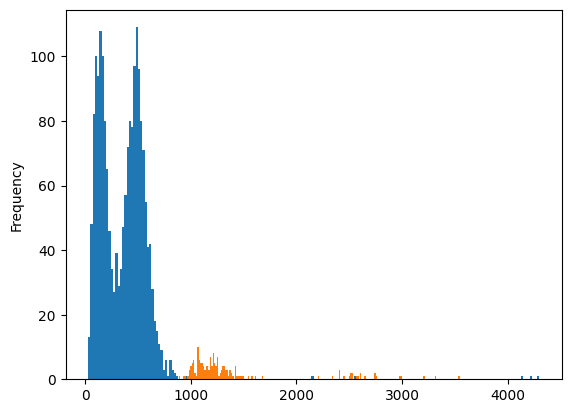

In [55]:
cle_seg_num.plot.hist(bins=200, label='CCLE')
clf_seg_num.plot.hist(bins=200, label='CCLF')

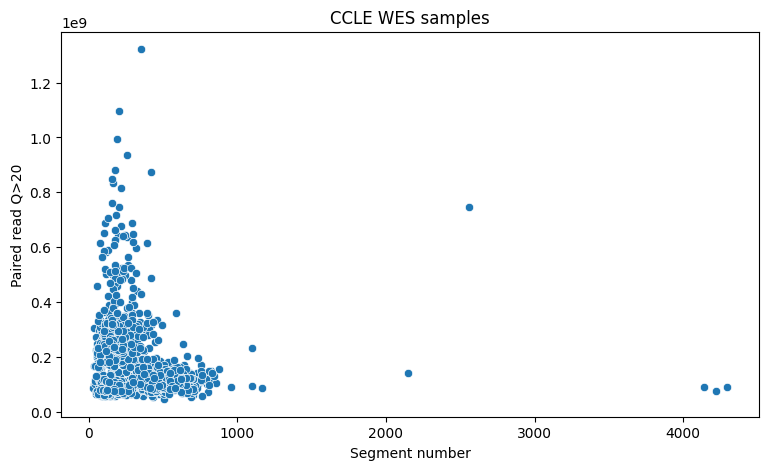

In [56]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(res, x='0_x', y=2, ax=ax)
ax.set_ylabel("Paired read Q>20")
ax.set_xlabel("Segment number")
ax.set_title("CCLE WES samples")
fig.set_size_inches(9, 5)

In [57]:
newclf = pd.read_table("latest_segments/23Q2.called.seg")
newclf_seg_num = newclf.groupby('Sample').apply(lambda x:x.shape[0])

In [58]:
newclf_seg_num

Sample
CDS-1Kp9PS     309
CDS-1aJRXx     251
CDS-243Iiz    2885
CDS-25UYkM     213
CDS-2L53g5     166
              ... 
CDS-xq1cLE      99
CDS-xzianm     156
CDS-yL3IFl     107
CDS-zJP5Rg     174
CDS-zTXTdf     217
Length: 169, dtype: int64

<Axes: ylabel='Frequency'>

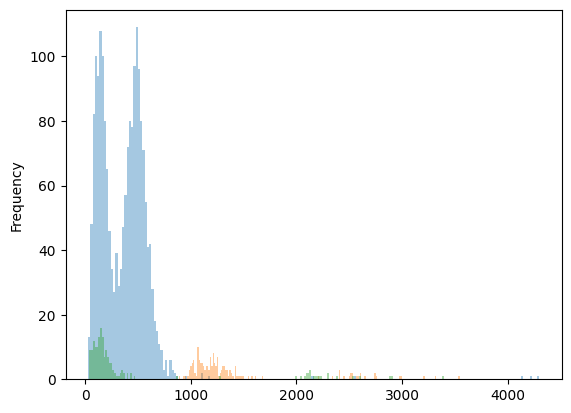

In [59]:
cle_seg_num.plot.hist(bins=200, alpha=0.4, label='CCLE')
clf_seg_num.plot.hist(bins=200, alpha=0.4, label='CCLF')
newclf_seg_num.plot.hist(bins=200, alpha=0.4, label='New CCLF')

# Load meta json with alt-aware bams

## Load coverage analysis

In [60]:
gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")
gcs_json_path = "gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/metadata.json"
with gcs_file_system.open(gcs_json_path) as f:
    json_dict = json.load(f)
depth2_output = [i['outputs']['result_sum'] for i in json_dict['calls']['BamMetrics.Depth2']]
depth2_output[:5]

['gs://broad-qqin-sparkles/BamMetrics/1e6caea9-17c3-46a6-bf63-d78cffd378e7/call-Depth2/shard-0/CDS-1aJRXx.hg38_depth.mosdepth.summary.txt',
 'gs://broad-qqin-sparkles/BamMetrics/1e6caea9-17c3-46a6-bf63-d78cffd378e7/call-Depth2/shard-1/CDS-1Kp9PS.hg38_depth.mosdepth.summary.txt',
 'gs://broad-qqin-sparkles/BamMetrics/1e6caea9-17c3-46a6-bf63-d78cffd378e7/call-Depth2/shard-2/CDS-243Iiz.hg38_depth.mosdepth.summary.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth2/shard-3/CDS-25UYkM.hg38_depth.mosdepth.summary.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth2/shard-4/CDS-2L53g5.hg38_depth.mosdepth.summary.txt']

In [61]:
dep2_list = []
dep2_name = []
for dep2 in depth2_output:
#    print(dep2)
    dep2_name.append(os.path.basename(dep2).split('.')[0])
    with gcs_file_system.open(dep2) as f:
        dep2_list.append(float(f.readlines()[-1].strip().split()[-3].decode('utf-8')))

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  3.,  6.,  6.,
         2.,  5., 10.,  4.,  6.,  7.,  5.,  2.,  6.,  8.,  8.,  5.,  5.,
         5.,  8.,  6.,  5.,  2.,  6.,  1.,  3.,  4.,  5.,  1.,  6.,  6.,
         0.,  4.,  4.,  3.,  1.,  3.,  0.,  1.,  2.,  0.,  1.]),
 array([ 13.89  ,  21.2052,  28.5204,  35.8356,  43.1508,  50.466 ,
         57.7812,  65.0964,  72.4116,  79.7268,  87.042 ,  94.3572,
        101.6724, 108.9876, 116.3028, 123.618 , 130.9332, 138.2484,
        145.5636, 152.8788, 160.194 , 167.5092, 174.8244, 182.1396,
        189.4548, 196.77  , 204.0852, 211.4004, 218.7156, 226.0308,
        233.346 , 240.6612, 247.9764, 255.2916, 262.6068, 269.922 ,
        277.2372, 284.5524, 291.8676, 299.1828, 306.498 , 313.8132,
        321.1284, 328.4436, 335.7588, 343.074 , 350.3892, 357.7044,
        365.0196, 372.3348, 379.65  ]),
 <BarContainer object of 50 artists>)

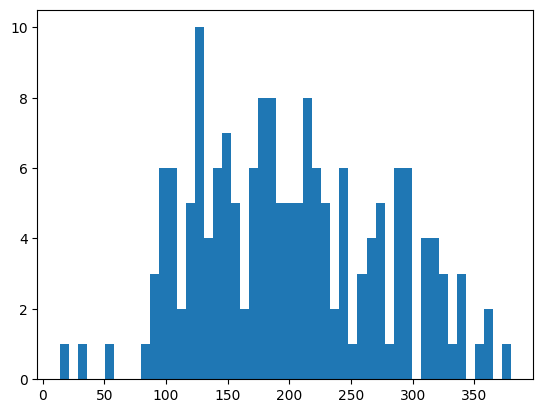

In [62]:
plt.hist(dep2_list, bins=50)

In [63]:
dep2_list = pd.DataFrame({"value": dep2_list, 'name': dep2_name})

In [64]:
depth3_output = [i['outputs']['HsMetrics'] for i in json_dict['calls']['BamMetrics.CollectHsMetrics']]
depth3_output[:5]

['gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-0/CDS-1aJRXx.hg38.hs_metrics.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-1/CDS-1Kp9PS.hg38.hs_metrics.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-2/CDS-243Iiz.hg38.hs_metrics.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-CollectHsMetrics/shard-3/CDS-25UYkM.hg38.hs_metrics.txt',
 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-CollectHsMetrics/shard-4/CDS-2L53g5.hg38.hs_metrics.txt']

In [65]:
dep3_list = []
for dep3 in depth3_output:
#    print(dep2)
    dep3_list.append(pd.read_table(dep3, skiprows=6, nrows=1).loc[:, ["BAIT_SET", "MEAN_BAIT_COVERAGE"]])

In [66]:
dep3_list = pd.concat(dep3_list, axis=0)

In [67]:
dep2_list.head()

,value,name
0,339.71,CDS-1aJRXx
1,217.28,CDS-1Kp9PS
2,108.63,CDS-243Iiz
3,218.74,CDS-25UYkM
4,205.68,CDS-2L53g5


In [68]:
dep3_list.head()

,BAIT_SET,MEAN_BAIT_COVERAGE
0,CDS-1aJRXx,400.600871
0,CDS-1Kp9PS,283.271925
0,CDS-243Iiz,121.178472
0,CDS-25UYkM,290.994958
0,CDS-2L53g5,271.152657


In [69]:
dep3_list.merge(dep2_list, left_on='BAIT_SET', right_on='name').corr()

/local/scratch/38730050.1.interactive/ipykernel_124220/2548090939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dep3_list.merge(dep2_list, left_on='BAIT_SET', right_on='name').corr()


,MEAN_BAIT_COVERAGE,value
MEAN_BAIT_COVERAGE,1.000000,0.987093
value,0.987093,1.000000


Text(0, 0.5, 'mosdepth on bait')

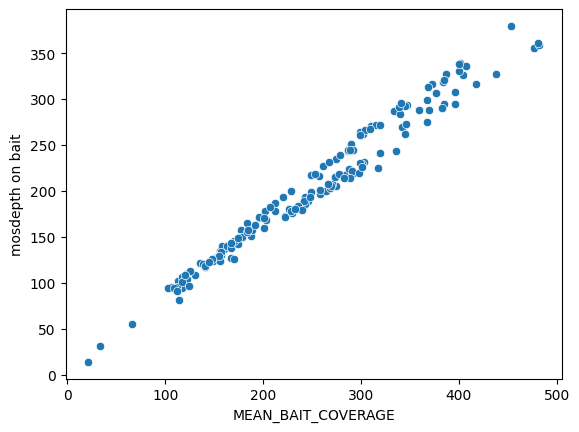

In [70]:
sns.scatterplot(x='MEAN_BAIT_COVERAGE', y='value', data=dep3_list.merge(dep2_list, left_on='BAIT_SET', right_on='name'))
plt.ylabel("mosdepth on bait")

(array([1., 1., 0., 0., 1., 0., 0., 0., 1., 5., 9., 3., 4., 3., 9., 6., 9.,
        4., 5., 4., 3., 3., 6., 5., 7., 4., 6., 7., 5., 6., 9., 3., 3., 1.,
        5., 4., 1., 4., 3., 6., 2., 5., 0., 1., 0., 1., 1., 0., 0., 3.]),
 array([ 21.272773  ,  30.48567346,  39.69857392,  48.91147438,
         58.12437484,  67.3372753 ,  76.55017576,  85.76307622,
         94.97597668, 104.18887714, 113.4017776 , 122.61467806,
        131.82757852, 141.04047898, 150.25337944, 159.4662799 ,
        168.67918036, 177.89208082, 187.10498128, 196.31788174,
        205.5307822 , 214.74368266, 223.95658312, 233.16948358,
        242.38238404, 251.5952845 , 260.80818496, 270.02108542,
        279.23398588, 288.44688634, 297.6597868 , 306.87268726,
        316.08558772, 325.29848818, 334.51138864, 343.7242891 ,
        352.93718956, 362.15009002, 371.36299048, 380.57589094,
        389.7887914 , 399.00169186, 408.21459232, 417.42749278,
        426.64039324, 435.8532937 , 445.06619416, 454.27909462,
      

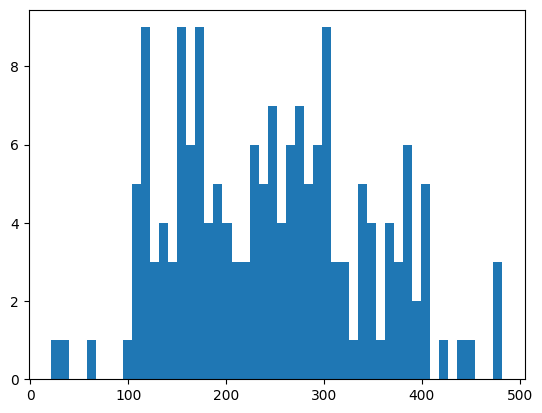

In [71]:
plt.hist(dep3_list.iloc[:, 1], bins=50)

In [72]:
depth_output = [i['stdout'] for i in json_dict['calls']['BamMetrics.Depth']]
cache_list = []
for dep1 in depth_output:
    print(dep1)
    try:
        with gcs_file_system.open(dep1) as f:
            dep1_list.append(float(f.read().strip().split()[-1].decode('utf-8')))    
    except:
        # cache files are in different folders
        with gcs_file_system.open(dep1.replace('stdout', 'cacheCopy/call_caching_placeholder.txt')) as f:
            cache_list.append(os.path.join(f.readlines()[-2].strip().split()[-1].decode('utf-8'), 'stdout'))
dep1_list = []
for dep1 in cache_list:
    with gcs_file_system.open(dep1) as f:
        dep1_list.append(float(f.read().strip().split()[-1].decode('utf-8')))  

gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-0/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-1/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-2/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-3/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-4/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-5/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-6/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-7/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-8/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-9/stdout
gs://broad

gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-83/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-84/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-85/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-86/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-87/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-88/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-89/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-90/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-91/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-92/stdout


gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-165/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-166/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-167/stdout
gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-Depth/shard-168/stdout


(array([ 1.,  0.,  0.,  6., 15., 14., 31., 13., 13.,  6.,  3.,  4.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  2.,  1.,  2.,  2.,  4.,  4.,  8.,  7.,  5.,  2.,
         3.,  1.,  2.,  0.,  3.,  2.,  0.,  3.,  3.,  0.,  3.]),
 array([ 4.67939  ,  5.3858882,  6.0923864,  6.7988846,  7.5053828,
         8.211881 ,  8.9183792,  9.6248774, 10.3313756, 11.0378738,
        11.744372 , 12.4508702, 13.1573684, 13.8638666, 14.5703648,
        15.276863 , 15.9833612, 16.6898594, 17.3963576, 18.1028558,
        18.809354 , 19.5158522, 20.2223504, 20.9288486, 21.6353468,
        22.341845 , 23.0483432, 23.7548414, 24.4613396, 25.1678378,
        25.874336 , 26.5808342, 27.2873324, 27.9938306, 28.7003288,
        29.406827 , 30.1133252, 30.8198234, 31.5263216, 32.2328198,
        32.939318 , 33.6458162, 34.3523144, 35.0588126, 35.7653108,
        36.471809 , 37.1783072, 37.8848054, 38.5913036, 39.2978018,
        40.0043   ]),
 <BarContainer

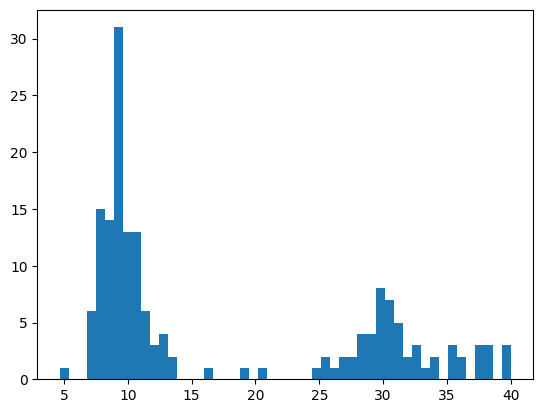

In [73]:
plt.hist(dep1_list, bins=50)

# old bams (not alt-aware with high segments)

In [74]:
gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")
gcs_json_path = "gs://broad-qqin-sparkles/BamMetrics/fbaa56e1-3ed9-4cc8-9c15-6d271df7f745/metadata.json"
with gcs_file_system.open(gcs_json_path) as f:
    json_dict = json.load(f)
depth_output = [i['stdout'] for i in json_dict['calls']['BamMetrics.Depth']]
dep1_list = []
for dep1 in depth_output:
    with gcs_file_system.open(dep1) as f:
        dep1_list.append(float(f.read().strip().split()[-1].decode('utf-8')))    

(array([ 1.,  0.,  0.,  6., 15., 11., 28., 19., 11.,  8.,  3.,  4.,  0.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  2.,  2.,  1.,  2.,  2.,  4.,  4.,  9.,  6.,  4.,  3.,
         3.,  1.,  2.,  0.,  3.,  2.,  0.,  3.,  3.,  0.,  3.]),
 array([ 4.60413  ,  5.2935094,  5.9828888,  6.6722682,  7.3616476,
         8.051027 ,  8.7404064,  9.4297858, 10.1191652, 10.8085446,
        11.497924 , 12.1873034, 12.8766828, 13.5660622, 14.2554416,
        14.944821 , 15.6342004, 16.3235798, 17.0129592, 17.7023386,
        18.391718 , 19.0810974, 19.7704768, 20.4598562, 21.1492356,
        21.838615 , 22.5279944, 23.2173738, 23.9067532, 24.5961326,
        25.285512 , 25.9748914, 26.6642708, 27.3536502, 28.0430296,
        28.732409 , 29.4217884, 30.1111678, 30.8005472, 31.4899266,
        32.179306 , 32.8686854, 33.5580648, 34.2474442, 34.9368236,
        35.626203 , 36.3155824, 37.0049618, 37.6943412, 38.3837206,
        39.0731   ]),
 <BarContainer

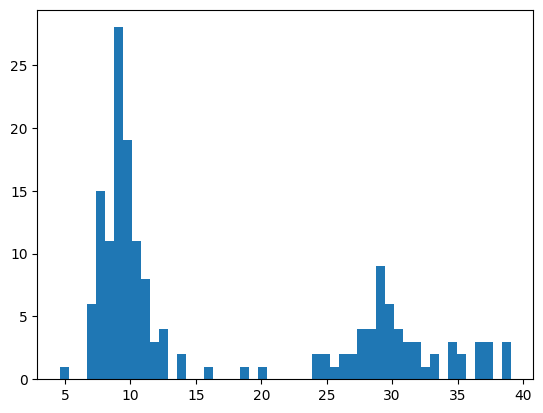

In [75]:
plt.hist(dep1_list, bins=50)

## Old bam do not have Depth2 from mosdepth
#### depth2_output = [i['outputs']['result_sum'] for i in json_dict['calls']['BamMetrics.Depth2']]

# HsMetrics/samtools depth/mosdepth read in coverage comparison

In [76]:
#test pandas API
pd.read_table('gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-*/*.hg38.hs_metrics.txt', skiprows=6, nrows=1)

,BAIT_SET,BAIT_TERRITORY,BAIT_DESIGN_EFFICIENCY,ON_BAIT_BASES,NEAR_BAIT_BASES,OFF_BAIT_BASES,PCT_SELECTED_BASES,PCT_OFF_BAIT,ON_BAIT_VS_SELECTED,MEAN_BAIT_COVERAGE,...,PCT_TARGET_BASES_25000X,PCT_TARGET_BASES_50000X,PCT_TARGET_BASES_100000X,AT_DROPOUT,GC_DROPOUT,HET_SNP_SENSITIVITY,HET_SNP_Q,SAMPLE,LIBRARY,READ_GROUP
0,CDS-1aJRXx,37287212,1,14937289594,7577145275,3787922783,0.855985,0.144015,0.663454,400.600871,...,0,0,0,7.58105,0.484025,0.980882,17,NaN,NaN,NaN


In [77]:
from google.cloud import storage
import os
client = storage.Client()
hsMetrics = []
for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics'):
    if 'hs_metrics' in blob.name:
        hsMetrics.append(pd.read_table(os.path.join("gs://broad-qqin-sparkles/", blob.name), skiprows=6, nrows=1))
hsMetrics = pd.concat(hsMetrics, axis=0)

In [78]:
hsMetrics.MEAN_TARGET_COVERAGE

0    257.115260
0    166.494099
0    101.237433
0    191.629781
0    108.651390
        ...    
0    289.321217
0    151.701166
0    267.207284
0    174.029621
0     92.178887
Name: MEAN_TARGET_COVERAGE, Length: 338, dtype: float64

In [79]:
hsMetrics.MEDIAN_TARGET_COVERAGE

0    200
0    138
0     76
0    163
0     95
    ... 
0    200
0    131
0    200
0    144
0     75
Name: MEDIAN_TARGET_COVERAGE, Length: 338, dtype: int64

In [80]:

# client = storage.Client()
# hsMetrics = []
# for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics'):
#     if 'alignment_summary_metrics' in blob.name:
#         print(blob.name)
#         hsMetrics.append(pd.read_table(os.path.join("gs://broad-qqin-sparkles/", blob.name), nrows=1,header=None,sep=' ').iloc[[2], :])
# hsMetrics = pd.concat(hsMetrics, axis=0)

## Library complexity

In [81]:
from google.cloud import storage
import os
client = storage.Client()
hsMetrics = []
for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e'):
    if 'libcomplex' in blob.name:
        print(blob.name)
        try:
            df = pd.read_table(os.path.join("gs://broad-qqin-sparkles/", blob.name), skiprows=6, nrows=1)
            print(df.head())
            hsMetrics.append(df)
        except:
            continue
hsMetrics = pd.concat(hsMetrics, axis=0)

BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-0/CDS-1aJRXx.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0330095985_Illumina_P5-Hewij_P7-Zidel                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            169170372                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              24042133   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        593241             0.142118               548359716  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-1/CDS-1Kp9PS.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0354304883_Illumina_P5-Yahih_P7-Zepon                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            128970599              

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243779049_Illumina_P5-Zecan_P7-Yexic                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            106819514                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0               9756858   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        299239              0.09134               563805290  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-110/CDS-PRfpjg.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0187456679_Illumina_P5-Wexoj_P7-Pahol                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            105946415                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0    

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0306773289_Illumina_P5-Pinez_P7-Xokix                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            206674899                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              42572661   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       2277515             0.205989               447760800  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-122/CDS-rPCQiq.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0245984640_Illumina_P5-Lilel_P7-Koweh                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            163377036                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0    

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0354304969_Illumina_P5-Zezip_P7-Lajar                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            107472696                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              25317632   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       1353015             0.235573               198064641  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-134/CDS-UGsBnn.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243727978_Illumina_P5-Worox_P7-Xinay                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            149750763                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0    

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243779042_Illumina_P5-Lahoy_P7-Difew                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            111593832                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              11489730   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        297870              0.10296               515627753  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-147/CDS-W5KtyM.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0219129296_Illumina_P5-Litaz_P7-Zafed                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             52759295                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0    

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243771161_Illumina_P5-Pifoc_P7-Hoden                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            122557222                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              12194891   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        287354             0.099504               586295415  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-159/CDS-Y5dmwC.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0187456659_Illumina_P5-Lorez_P7-Hinij                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             86121366                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0    

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0245984653_Illumina_P5-Pifaz_P7-Hihar                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            135717092                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              29632538   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       2097620             0.218341               277944535  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-18/CDS-8m2ZS7.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0187456685_Illumina_P5-Nalok_P7-Teyay                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             86727622                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0354304941_Illumina_P5-Docop_P7-Hikiw                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            131983793                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              31924261   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       1874251              0.24188               236388811  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-30/CDS-bJLqlg.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0306773257_Illumina_P5-Polez_P7-Bezic                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            216431770                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

       LIBRARY  UNPAIRED_READS_EXAMINED  READ_PAIRS_EXAMINED  \
0  Pond-139372                        0             33740671   

   SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  UNPAIRED_READ_DUPLICATES  \
0                               0               0                         0   

   READ_PAIR_DUPLICATES  READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  \
0               4330640                           557             0.128351   

   ESTIMATED_LIBRARY_SIZE  
0               119946614  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-42/CDS-dWHB0S.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0177198044_Illumina_P5-Zecan_P7-Yexic                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             88354433                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              12118162   

   R

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243779029_Illumina_P5-Poded_P7-Rojan                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             91778981                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0               8505292   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        205695             0.092671               474175924  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-54/CDS-fbDG7M.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0243771180_Illumina_P5-Depob_P7-Binot                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            144665593                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0330095991_Illumina_P5-Zitey_P7-Fapix                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            143851809                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              18525038   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                        422043             0.128779               519306345  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-66/CDS-HaYnY4.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0330096010_Illumina_P5-Popal_P7-Xezit                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            123750733                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0306773271_Illumina_P5-Tehax_P7-Nedob                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            195759679                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              39463065   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       2122271             0.201589               435205139  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-78/CDS-JfSOor.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0180678232_Illumina_P5-Pifoc_P7-Hoden                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             76758633                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0201183323_Illumina_P5-Yalor_P7-Doyez                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0             76461605                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0                         0              17634264   

   READ_PAIR_OPTICAL_DUPLICATES  PERCENT_DUPLICATION  ESTIMATED_LIBRARY_SIZE  
0                       1489741             0.230629               148068837  
BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-90/CDS-m9etwI.hg38.libcomplex
                                 LIBRARY  UNPAIRED_READS_EXAMINED  \
0  0330095975_Illumina_P5-Zehil_P7-Hefel                        0   

   READ_PAIRS_EXAMINED  SECONDARY_OR_SUPPLEMENTARY_RDS  UNMAPPED_READS  \
0            113628105                               0               0   

   UNPAIRED_READ_DUPLICATES  READ_PAIR_DUPLICATES  \
0     

(array([ 1.,  2., 16., 36., 29., 19., 13., 27., 23.,  3.]),
 array([0.034911 , 0.0597283, 0.0845456, 0.1093629, 0.1341802, 0.1589975,
        0.1838148, 0.2086321, 0.2334494, 0.2582667, 0.283084 ]),
 <BarContainer object of 10 artists>)

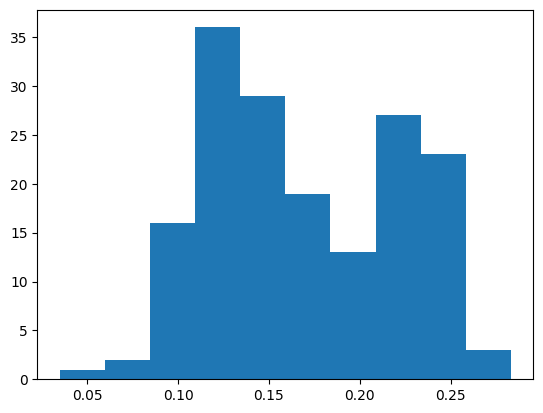

In [82]:
plt.hist(hsMetrics.PERCENT_DUPLICATION)

## Raw Read count comparison between alt and non-alt bams

In [83]:
from google.cloud import storage
import os
client = storage.Client()
flagstatMetrics = []
names = []
for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics/c3f68d21-844c-46d7-89cd-7ee6b4e719e2'):
    if 'flagstat' in blob.name:
        names.append(os.path.basename(blob.name).split('.')[0])
        flagstatMetrics.append(pd.read_table(os.path.join("gs://broad-qqin-sparkles/", blob.name), 
                                             header=None, nrows=1, delimiter=' ').iloc[:, :3])
flagstatMetrics = pd.concat(flagstatMetrics, axis=0)

In [84]:
flagstatMetrics.index = names

In [85]:
flagstatMetrics.head()

,0,1,2
CDS-47xt4s,154940631,+,18792001
CDS-NWe8TD,365042917,+,0
CDS-oKc8EY,191672097,+,0
CDS-oloAgD,131910653,+,0
CDS-oPZIGD,305066430,+,0


In [86]:
flagstatMetrics.shape

(166, 3)

In [87]:

client = storage.Client()
flagstatMetrics_noalt = []
names = []
#broad-qqin-sparkles/BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e
for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e'):
    if 'flagstat' in blob.name:
        names.append(os.path.basename(blob.name).split('.')[0])
        flagstatMetrics_noalt.append(pd.read_table(os.path.join("gs://broad-qqin-sparkles/", blob.name), 
                                             header=None, nrows=1, delimiter=' ').iloc[:, :3])
flagstatMetrics_noalt = pd.concat(flagstatMetrics_noalt, axis=0)

In [88]:
flagstatMetrics_noalt.index = names

In [89]:
flagstatMetrics_noalt.head()

,0,1,2
CDS-1aJRXx,347996463,+,0
CDS-1Kp9PS,267634162,+,0
CDS-47xt4s,153827607,+,18677149
CDS-nwbxri,272015830,+,0
CDS-NWe8TD,363452225,+,0


In [90]:
flagstatMetrics_noalt.head()

,0,1,2
CDS-1aJRXx,347996463,+,0
CDS-1Kp9PS,267634162,+,0
CDS-47xt4s,153827607,+,18677149
CDS-nwbxri,272015830,+,0
CDS-NWe8TD,363452225,+,0


In [91]:
flagstatMetrics_noalt_final = flagstatMetrics_noalt.merge(flagstatMetrics, left_index=True, right_index=True)

In [92]:
flagstatMetrics_noalt_final.head()

,0_x,1_x,2_x,0_y,1_y,2_y
CDS-47xt4s,153827607,+,18677149,154940631,+,18792001
CDS-nwbxri,272015830,+,0,273281737,+,0
CDS-NWe8TD,363452225,+,0,365042917,+,0
CDS-oKc8EY,190351432,+,0,191672097,+,0
CDS-oloAgD,131423646,+,0,131910653,+,0


Text(0.5, 0, 'original')

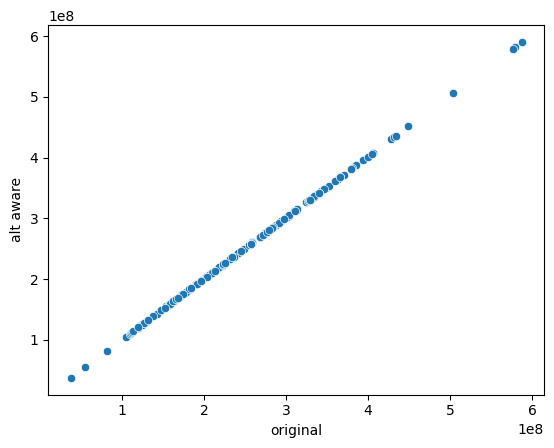

In [93]:
sns.scatterplot(flagstatMetrics_noalt_final, x='0_x', y='0_y')
plt.ylabel("alt aware")
plt.xlabel("original")

# Alignment summary/samtools comparison for high quality reads

In [94]:
# new bams
import re

gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")

client = storage.Client()
flagstatMetrics = []
names = []
for blob in client.list_blobs('broad-qqin-sparkles', prefix='BamMetrics/c3f68d21-844c-46d7-89cd-7ee6b4e719e2'):    
    if 'stdout' in blob.name and 'call-Count' in blob.name:
        if 'pipelines-logs' not in blob.name:
            with gcs_file_system.open(os.path.join("gs://broad-qqin-sparkles/", blob.name).replace('stdout', 'Count-0.log')) as f:                
                target_line = f.readlines()[4].decode('utf-8')
                name = target_line.split('/')[-1]
                names.append(name)
#                print(os.path.join("gs://broad-qqin-sparkles/", blob.name).replace('stdout', 'Count-0.log'))
#                print(target_line)
#                print(name)
            with gcs_file_system.open(os.path.join("gs://broad-qqin-sparkles/", blob.name)) as f:
                flagstatMetrics.append(float(f.read().strip().split()[-1].decode('utf-8')))
#            break

In [95]:
len(flagstatMetrics)

166

In [96]:
len(names)

166

(array([ 2.,  1.,  0., 16.,  8., 21., 15., 18., 17., 17., 17., 10.,  9.,
         6.,  4.,  1.,  0.,  1.,  0.,  3.]),
 array([1.37623510e+07, 3.89489472e+07, 6.41355434e+07, 8.93221396e+07,
        1.14508736e+08, 1.39695332e+08, 1.64881928e+08, 1.90068524e+08,
        2.15255121e+08, 2.40441717e+08, 2.65628313e+08, 2.90814909e+08,
        3.16001505e+08, 3.41188102e+08, 3.66374698e+08, 3.91561294e+08,
        4.16747890e+08, 4.41934486e+08, 4.67121083e+08, 4.92307679e+08,
        5.17494275e+08]),
 <BarContainer object of 20 artists>)

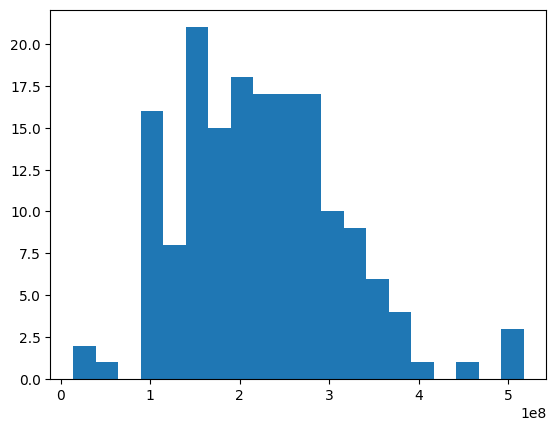

In [97]:
plt.hist(flagstatMetrics, bins=20)

In [98]:
# New bams
gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")
gcs_json_path = "gs://broad-qqin-sparkles/BamMetrics/50f6e3b8-b1bb-4055-9508-42596cfa0d6d/metadata.json"
with gcs_file_system.open(gcs_json_path) as f:
    json_dict = json.load(f)
count_output = [i['outputs']['alignmentSummary'] for i in json_dict['calls']['BamMetrics.picardMetrics']]

In [99]:
align_res_new = []
for align in count_output:
    align_res_new.append(pd.read_table(align, skiprows=6).loc[:, ['PF_HQ_ALIGNED_READS']])
align_res_new = pd.concat(align_res_new, axis=1)   
align_res_new.columns = list(map(lambda x:os.path.basename(x).split('.')[0], count_output))
count_output[:5]

['gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-picardMetrics/shard-0/CDS-1aJRXx.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-picardMetrics/shard-1/CDS-1Kp9PS.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/1e6caea9-17c3-46a6-bf63-d78cffd378e7/call-picardMetrics/shard-2/CDS-243Iiz.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/c3f68d21-844c-46d7-89cd-7ee6b4e719e2/call-picardMetrics/shard-3/CDS-25UYkM.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/c3f68d21-844c-46d7-89cd-7ee6b4e719e2/call-picardMetrics/shard-4/CDS-2L53g5.hg38.alignment_summary_metrics']

In [100]:
align_res_new = align_res_new.iloc[:3, :]

In [101]:
align_res_new.shape

(3, 169)

In [102]:
##Old bams files 
gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")
gcs_json_path = "gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json"
with gcs_file_system.open(gcs_json_path) as f:
    json_dict = json.load(f)
count_output = [i['outputs']['alignmentSummary'] for i in json_dict['calls']['BamMetrics.picardMetrics']]
align_res = []
for align in count_output:
    align_res.append(pd.read_table(align, skiprows=6).loc[:, ['PF_HQ_ALIGNED_READS']])
align_res = pd.concat(align_res, axis=1)   
align_res.columns = list(map(lambda x:os.path.basename(x).split('.')[0], count_output))
count_output[:5]    

['gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-picardMetrics/shard-0/CDS-1aJRXx.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-picardMetrics/shard-1/CDS-1Kp9PS.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-picardMetrics/shard-2/CDS-243Iiz.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-picardMetrics/shard-3/CDS-25UYkM.hg38.alignment_summary_metrics',
 'gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-picardMetrics/shard-4/CDS-2L53g5.hg38.alignment_summary_metrics']

In [103]:
align_res = align_res.iloc[:3, :]
hq_res_df = pd.concat([align_res_new.T, align_res.T.loc[align_res_new.columns, :]], axis=1).iloc[:, [2, 5]]

In [104]:
hq_res_df.columns = ['new', 'old']

<Axes: xlabel='new', ylabel='old'>

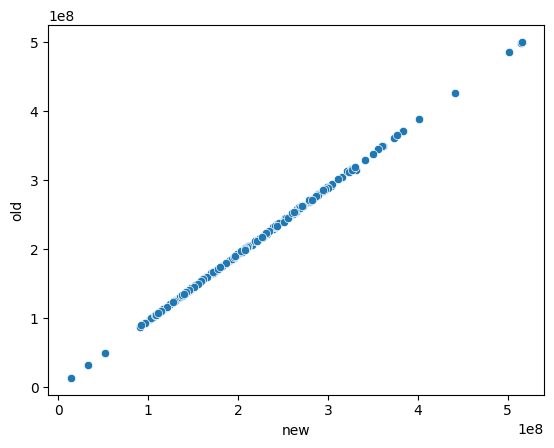

In [105]:
sns.scatterplot(x='new', y='old', data=hq_res_df)

<Axes: >

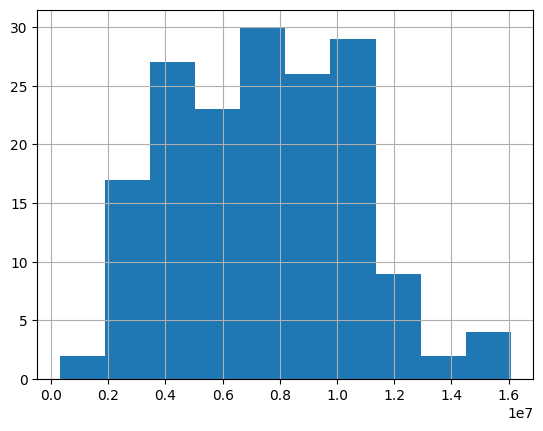

In [106]:
(hq_res_df.new - hq_res_df.old).hist()

<Axes: >

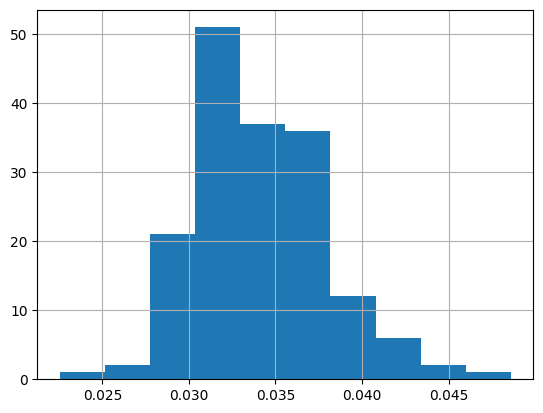

In [107]:
((hq_res_df.new - hq_res_df.old)/hq_res_df.new).hist()

In [108]:
#new bams
samtools_count_df = pd.DataFrame({'names': list(map(lambda x:x.strip().split('.')[0], names)), 'flagstatMetrics': flagstatMetrics})

In [109]:
samtools_count_df = samtools_count_df.loc[samtools_count_df.names!='monitoring', :]

In [110]:
from scipy.stats import pearsonr
pearsonr(hq_res_df.loc[samtools_count_df.names, :].new, samtools_count_df.flagstatMetrics)

PearsonRResult(statistic=0.9981251361139795, pvalue=2.9706269132433074e-197)

In [111]:
pearsonr(hq_res_df.loc[samtools_count_df.names, :].old, samtools_count_df.flagstatMetrics)

PearsonRResult(statistic=0.9980274557904327, pvalue=1.765101217882806e-195)

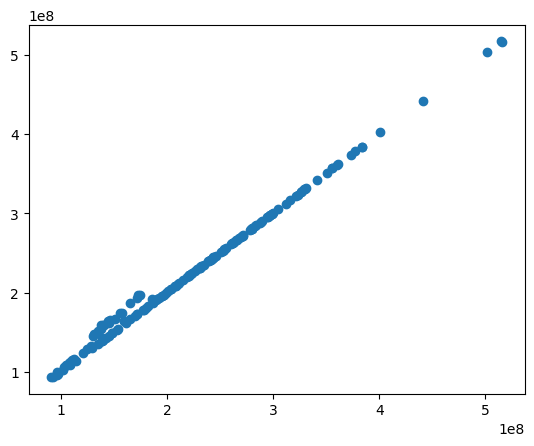

In [112]:
plt.scatter(hq_res_df.loc[samtools_count_df.names, :].new, samtools_count_df.flagstatMetrics)

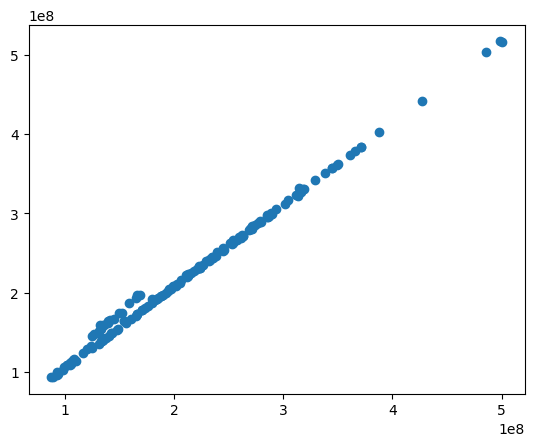

In [113]:
plt.scatter(hq_res_df.loc[samtools_count_df.names, :].old, samtools_count_df.flagstatMetrics)

# Coverage analysis for old and new bams

In [135]:
def parse_output_from_wdlmeta(metafile: str="gs://broad-qqin-sparkles/BamMetrics/50f6e3b8-b1bb-4055-9508-42596cfa0d6d/metadata.json",
                              metric='depth') -> pd.DataFrame:
    """ new bam metafile gs://broad-qqin-sparkles/BamMetrics/50f6e3b8-b1bb-4055-9508-42596cfa0d6d/metadata.json
    old bam metafile gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json
    
    """
    gcs_file_system = gcsfs.GCSFileSystem(project="broad-qqin")
    with gcs_file_system.open(metafile) as f:
        json_dict = json.load(f)   

    if metric == 'depth':
        depth3_output = [i['outputs']['HsMetrics'] for i in json_dict['calls']['BamMetrics.CollectHsMetrics']]
        print(depth3_output[:5])
        dep3_list = []
        for dep3 in depth3_output:
            dep3_list.append(pd.read_table(dep3, skiprows=6, nrows=1).loc[:, ["BAIT_SET", "MEAN_BAIT_COVERAGE"]])
        df = pd.concat(dep3_list, axis=0)
    if metric == 'align':
        count_output = [i['outputs']['alignmentSummary'] for i in json_dict['calls']['BamMetrics.picardMetrics']]
        align_res = []
        for align in count_output:
            align_res.append(pd.read_table(align, skiprows=6).loc[:, ['PF_HQ_ALIGNED_READS']])
        df = pd.concat(align_res, axis=1)   
        df.columns = list(map(lambda x:os.path.basename(x).split('.')[0], count_output))        
    if metric == 'libcomplex':
        lib_output = [i['outputs']['metricsFile'] for i in json_dict['calls']['BamMetrics.Libcomplex']]
        lib_res = []
        names = []
        for lib in lib_output:
            try:
                lib_res.append(pd.read_table(lib, skiprows=6).loc[:, ['PERCENT_DUPLICATION']])     
                names.append(os.path.basename(lib).split('.')[0])
            except:
                print(lib)
                pass
        df = pd.concat(lib_res, axis=1)
        df.columns = names
        
    if metric == 'gc':
        gc_output = [i['outputs']['gcBiasSummary'] for i in json_dict['calls']['BamMetrics.picardMetrics']]
        gc_res = []
        names = []
        for gc in gc_output:
            try:
                gc_res.append(pd.read_table(gc, skiprows=6))
                names.append(os.path.basename(gc).split('.')[0])
            except:
                print(gc)
                pass
        print(len(gc_res))
        print(len(names))
        df = pd.concat(gc_res, axis=0)   
        df.index = names                 
    return df

In [115]:
hs_dep_new = parse_output_from_wdlmeta()
hs_dep_old = parse_output_from_wdlmeta('gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json')

['gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-0/CDS-1aJRXx.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-1/CDS-1Kp9PS.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/b1930991-8c01-4ca4-bdf8-55b8302b1c28/call-CollectHsMetrics/shard-2/CDS-243Iiz.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-CollectHsMetrics/shard-3/CDS-25UYkM.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/b012f426-0347-4433-8d16-f4298a134614/call-CollectHsMetrics/shard-4/CDS-2L53g5.hg38.hs_metrics.txt']
['gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-CollectHsMetrics/shard-0/CDS-1aJRXx.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/call-CollectHsMetrics/shard-1/CDS-1Kp9PS.hg38.hs_metrics.txt', 'gs://broad-qqin-sparkles/BamMetrics/01

<Axes: xlabel='variable', ylabel='value'>

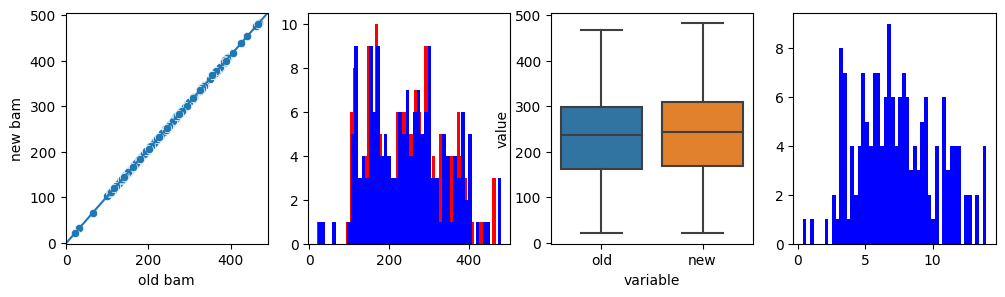

In [116]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(12, 3)
depths_df = hs_dep_old.merge(hs_dep_new, on='BAIT_SET')

sns.scatterplot(x='MEAN_BAIT_COVERAGE_x', y='MEAN_BAIT_COVERAGE_y',
                data=depths_df, ax=ax[0])
ax[0].set_xlabel('old bam')
ax[0].set_ylabel('new bam')
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes)
ax[1].hist(depths_df.MEAN_BAIT_COVERAGE_x, bins=50, color='red')
ax[1].hist(depths_df.MEAN_BAIT_COVERAGE_y, bins=50, color='blue')

ax[3].hist(depths_df.MEAN_BAIT_COVERAGE_y-depths_df.MEAN_BAIT_COVERAGE_x, bins=50, color='blue')
depths_df.index = depths_df.BAIT_SET
depths_df.drop(columns=['BAIT_SET'], inplace=True)
depths = depths_df.melt()
depths['variable'] = depths['variable'] .map({"MEAN_BAIT_COVERAGE_x": 'old', 'MEAN_BAIT_COVERAGE_y': 'new'})
sns.boxplot(x='variable', y='value', data=depths, ax=ax[2])

In [117]:
depths_df.head()

,MEAN_BAIT_COVERAGE_x,MEAN_BAIT_COVERAGE_y
BAIT_SET,,
CDS-1aJRXx,388.858339,400.600871
CDS-1Kp9PS,273.621144,283.271925
CDS-243Iiz,118.548344,121.178472
CDS-25UYkM,280.747310,290.994958
CDS-2L53g5,264.162896,271.152657


(0.0, 3500.0)

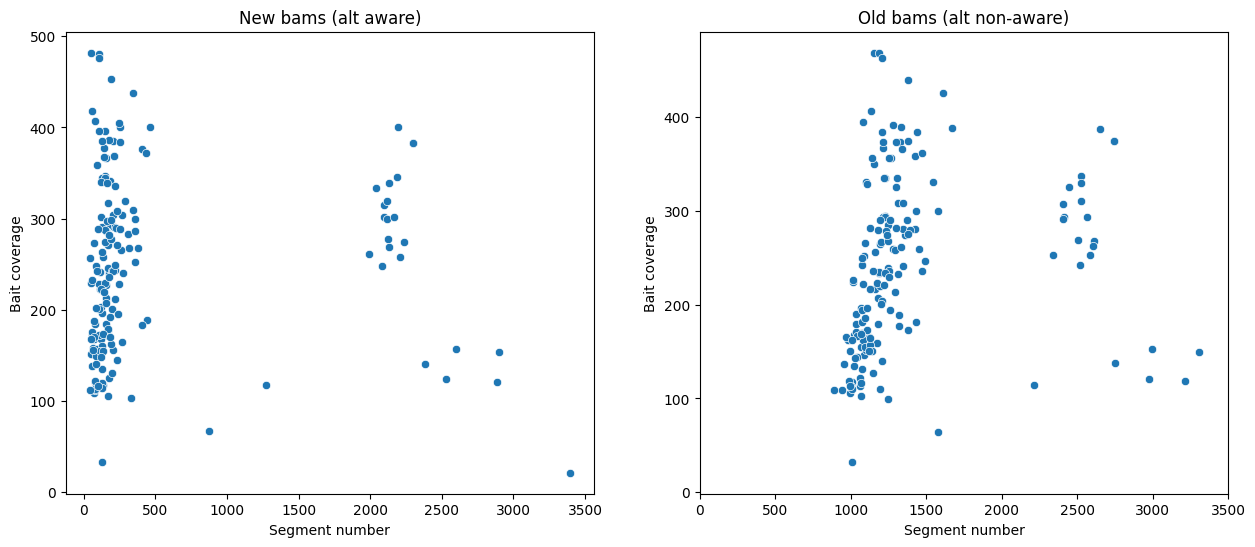

In [118]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='MEAN_BAIT_COVERAGE_y', 
                data=pd.concat([pd.DataFrame(newclf_seg_num), depths_df.loc[newclf_seg_num.index, :]], axis=1),
                ax=ax[0])
ax[0].set_title("New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")


sns.scatterplot(x=0, y='MEAN_BAIT_COVERAGE_x', 
                data=pd.concat([pd.DataFrame(clf_seg_num), depths_df.loc[clf_seg_num.index, :]], axis=1),
                ax=ax[1])
ax[1].set_title("Old bams (alt non-aware)")
ax[1].set_xlabel("Segment number")
ax[1].set_ylabel("Bait coverage")
ax[1].set_xlim(0, 3500)


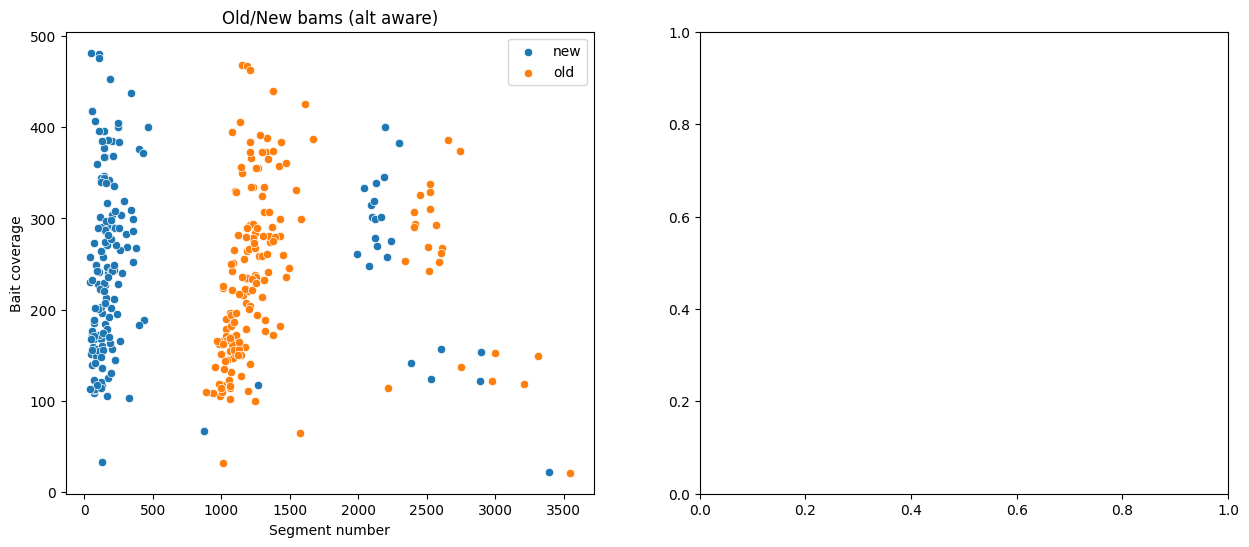

In [119]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='MEAN_BAIT_COVERAGE_y', 
                data=pd.concat([pd.DataFrame(newclf_seg_num), depths_df.loc[newclf_seg_num.index, :]], axis=1),
                ax=ax[0], label='new')
ax[0].set_title("Old/New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")


ax = sns.scatterplot(x=0, y='MEAN_BAIT_COVERAGE_x', 
                data=pd.concat([pd.DataFrame(clf_seg_num), depths_df.loc[clf_seg_num.index, :]], axis=1),
                ax=ax[0], label='old')


In [120]:
align_new = parse_output_from_wdlmeta(metric='align')
align_old = parse_output_from_wdlmeta('gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json', metric='align')
align_new = align_new.iloc[:3, :]
align_old = align_old.iloc[:3, :]

<Axes: xlabel='variable', ylabel='value'>

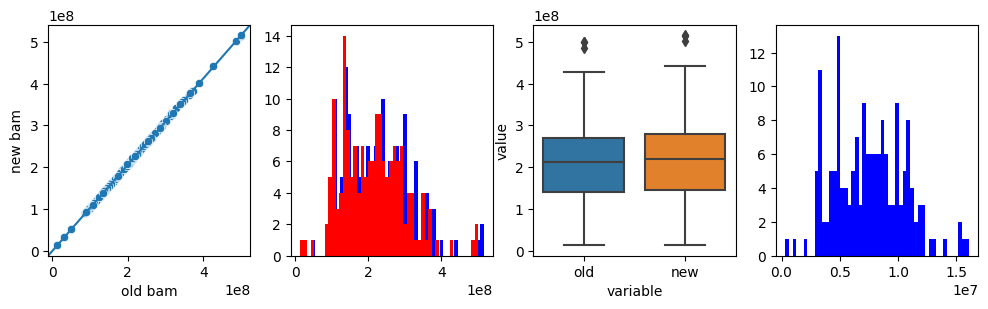

In [121]:
hq_res_df = pd.concat([align_old.T.loc[align_new.columns, :], align_new.T], axis=1).iloc[:, [2, 5]]
hq_res_df.columns = ['old', 'new']

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(12, 3)

sns.scatterplot(x='old', y='new',
                data=hq_res_df, ax=ax[0])
ax[0].set_xlabel('old bam')
ax[0].set_ylabel('new bam')
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes)

ax[1].hist(hq_res_df.new, bins=50, color='blue')
ax[1].hist(hq_res_df.old, bins=50, color='red')

ax[3].hist(hq_res_df.new-hq_res_df.old, bins=50, color='blue')

hq_res = hq_res_df.melt()
sns.boxplot(x='variable', y='value', data=hq_res, ax=ax[2])

In [122]:
hq_res_df.head()

,old,new
CDS-1aJRXx,291986554.0,303079142.0
CDS-1Kp9PS,218358733.0,227390611.0
CDS-243Iiz,113055868.0,116413717.0
CDS-25UYkM,228990829.0,239044899.0
CDS-2L53g5,258013667.0,265943647.0


(0.0, 3500.0)

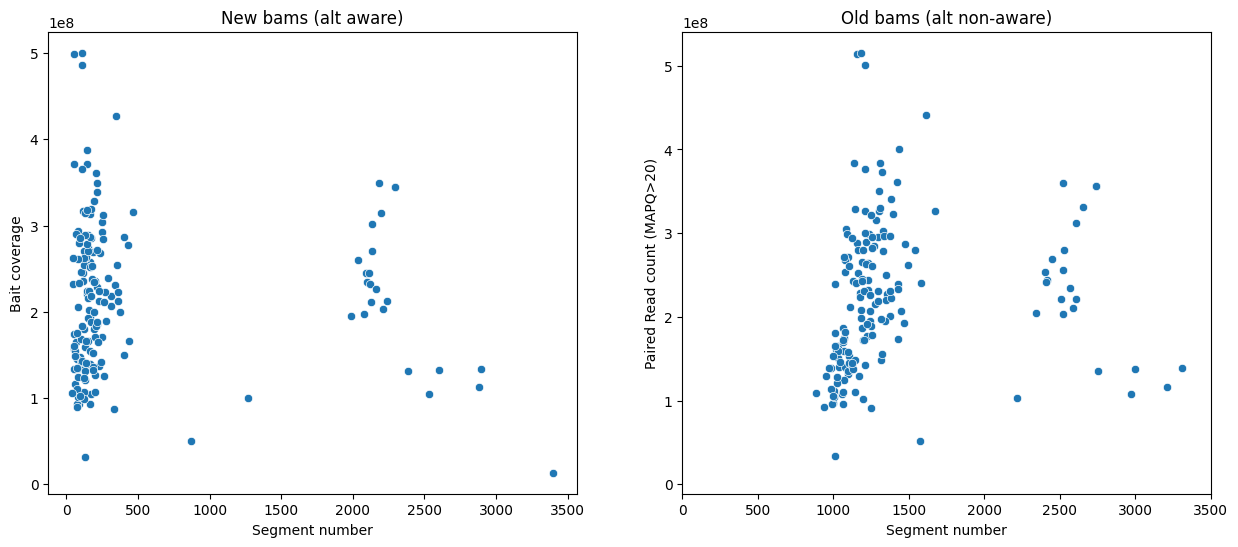

In [123]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='old', 
                data=pd.concat([pd.DataFrame(newclf_seg_num), hq_res_df.loc[newclf_seg_num.index, :]], axis=1),
                ax=ax[0])
ax[0].set_title("New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")


sns.scatterplot(x=0, y='new', 
                data=pd.concat([pd.DataFrame(clf_seg_num), hq_res_df.loc[clf_seg_num.index, :]], axis=1),
                ax=ax[1])
ax[1].set_title("Old bams (alt non-aware)")
ax[1].set_xlabel("Segment number")
ax[1].set_ylabel("Paired Read count (MAPQ>20)")
ax[1].set_xlim(0, 3500)


<Axes: title={'center': 'Old/New bams (alt non-aware)'}, xlabel='Segment number', ylabel='Paired read Q>20'>

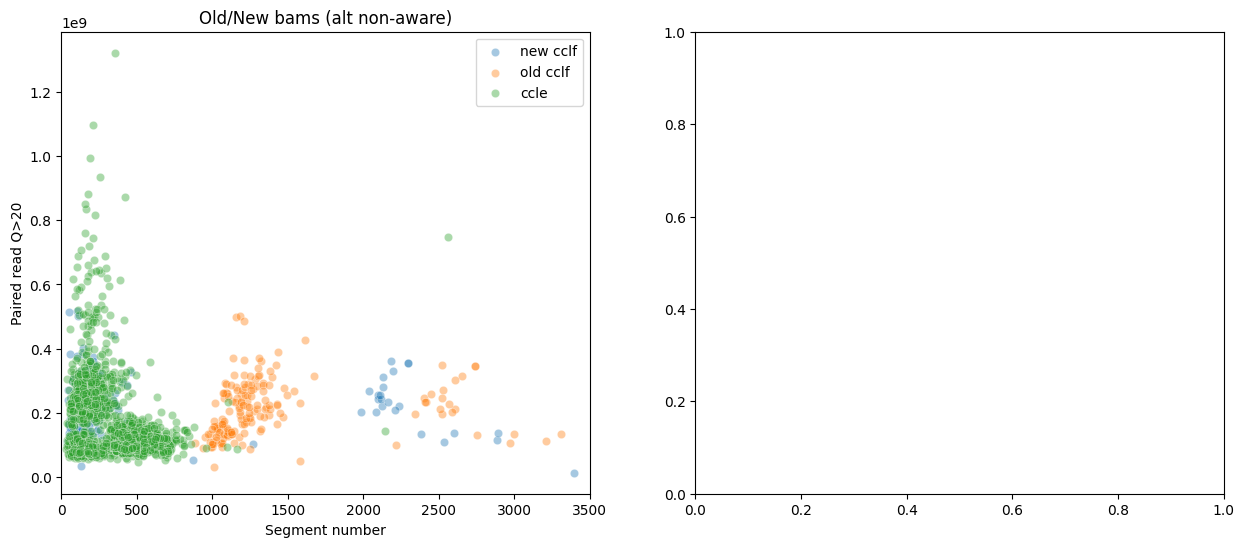

In [124]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='new', 
                data=pd.concat([pd.DataFrame(newclf_seg_num), hq_res_df.loc[newclf_seg_num.index, :]], axis=1),
                ax=ax[0], alpha=0.4, label='new cclf')
ax[0].set_title("New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")


sns.scatterplot(x=0, y='old', 
                data=pd.concat([pd.DataFrame(clf_seg_num), hq_res_df.loc[clf_seg_num.index, :]], axis=1),
                ax=ax[0], alpha=0.4, label='old cclf')
ax[0].set_title("Old/New bams (alt non-aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Paired read Q>20")
ax[0].set_xlim(0, 3500)

sns.scatterplot(res, x='0_x', y=2, ax=ax[0], alpha=0.4, label='ccle')
# ax[1].set_ylabel("Paired read Q>20")
# ax[1].set_xlabel("Segment number")
# ax[1].set_title("CCLE WES samples")
# fig.set_size_inches(9, 5)

In [125]:
lib_new = parse_output_from_wdlmeta(metric='libcomplex')
lib_old = parse_output_from_wdlmeta('gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json', metric='libcomplex')

gs://broad-qqin-sparkles/BamMetrics/c3f68d21-844c-46d7-89cd-7ee6b4e719e2/call-Libcomplex/shard-142/CDS-VNR5t7.hg38.libcomplex
gs://broad-qqin-sparkles/BamMetrics/5a863ea2-c8a6-4d24-a56c-c8984c5a125e/call-Libcomplex/shard-143/CDS-VNR5t7.hg38.libcomplex


<Axes: xlabel='variable', ylabel='value'>

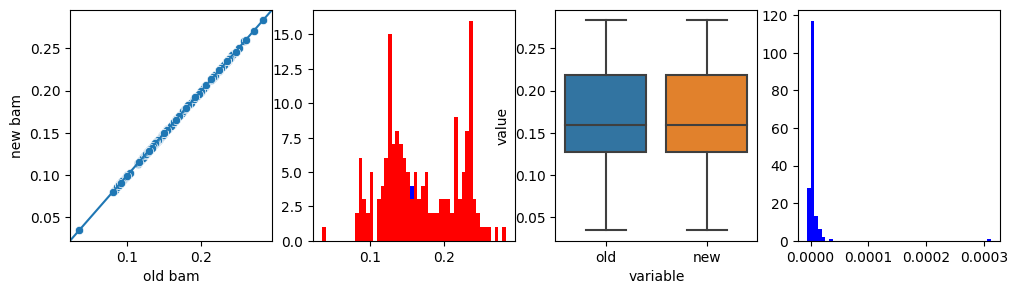

In [126]:
lib_df = pd.concat([lib_old.iloc[[0], :].T,lib_new.iloc[[0], :].T], axis=1)
lib_df.columns = ['old', 'new']
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(12, 3)

sns.scatterplot(x='old', y='new',
                data=lib_df, ax=ax[0])
ax[0].set_xlabel('old bam')
ax[0].set_ylabel('new bam')
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes)

ax[1].hist(lib_df.new, bins=50, color='blue')
ax[1].hist(lib_df.old, bins=50, color='red')

ax[3].hist(lib_df.new-lib_df.old, bins=50, color='blue')

lib = lib_df.melt()
sns.boxplot(x='variable', y='value', data=lib, ax=ax[2])

In [127]:
lib_index = np.intersect1d(newclf_seg_num.index, lib_df.index)

(0.0, 3500.0)

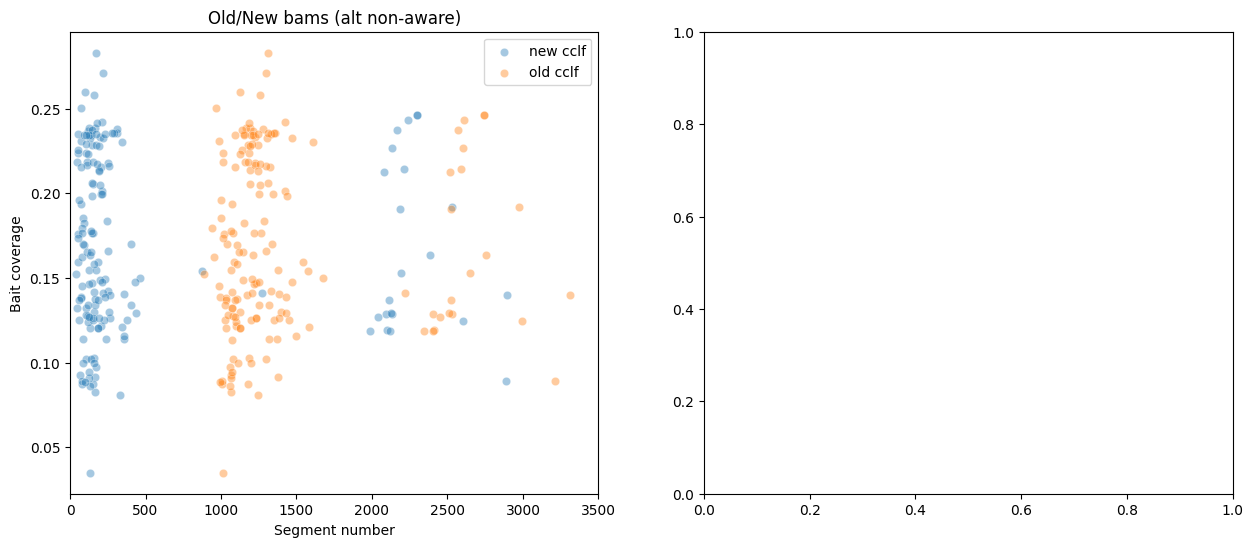

In [133]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='new', 
                data=pd.concat([pd.DataFrame(newclf_seg_num).loc[lib_index, :], lib_df.loc[lib_index, :]], axis=1),
                ax=ax[0], alpha=0.4, label='new cclf')
ax[0].set_title("New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")


sns.scatterplot(x=0, y='old', 
                data=pd.concat([pd.DataFrame(clf_seg_num).loc[lib_index, :], lib_df.loc[lib_index, :]], axis=1),
                ax=ax[0], alpha=0.4, label='old cclf')
ax[0].set_title("Old/New bams (alt non-aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("Bait coverage")
ax[0].set_xlim(0, 3500)

# sns.scatterplot(res, x='0_x', y=2, ax=ax[0], alpha=0.4, label='ccle')
# ax[1].set_ylabel("Paired read Q>20")
# ax[1].set_xlabel("Segment number")
# ax[1].set_title("CCLE WES samples")
# fig.set_size_inches(9, 5)

In [136]:
gc_new = parse_output_from_wdlmeta(metric='gc')

169
169


In [148]:
gc_old = parse_output_from_wdlmeta('gs://broad-qqin-sparkles/BamMetrics/01aad669-2562-4725-8170-c2d83452fcb0/metadata.json', metric='gc')

169
169


In [141]:
gc_new.head()

,ACCUMULATION_LEVEL,READS_USED,WINDOW_SIZE,TOTAL_CLUSTERS,ALIGNED_READS,AT_DROPOUT,GC_DROPOUT,GC_NC_0_19,GC_NC_20_39,GC_NC_40_59,GC_NC_60_79,GC_NC_80_100,SAMPLE,LIBRARY,READ_GROUP
CDS-1aJRXx,All Reads,ALL,100,174709295,348279595,39.381578,0.009275,0.070105,0.305524,1.188274,6.085425,2.886582,NaN,NaN,NaN
CDS-1Kp9PS,All Reads,ALL,100,134702053,268326477,38.897309,0.008018,0.105824,0.327226,1.152700,6.197275,3.461587,NaN,NaN,NaN
CDS-243Iiz,All Reads,ALL,100,68398004,135531531,29.336667,0.022686,0.201454,0.450500,1.254966,4.042125,1.286595,NaN,NaN,NaN
CDS-25UYkM,All Reads,ALL,100,138046097,275083036,37.211708,0.008794,0.121335,0.356174,1.144249,5.999222,3.142368,NaN,NaN,NaN
CDS-2L53g5,All Reads,ALL,100,150337631,299681746,30.143889,0.004388,0.174397,0.448199,1.203659,4.532460,2.673493,NaN,NaN,NaN


In [149]:
gc_old.head()

,ACCUMULATION_LEVEL,READS_USED,WINDOW_SIZE,TOTAL_CLUSTERS,ALIGNED_READS,AT_DROPOUT,GC_DROPOUT,GC_NC_0_19,GC_NC_20_39,GC_NC_40_59,GC_NC_60_79,GC_NC_80_100,SAMPLE,LIBRARY,READ_GROUP
CDS-1aJRXx,All Reads,ALL,100,173958943,346808842,39.277874,0.009249,0.068941,0.306597,1.190253,6.056669,2.860969,NaN,NaN,NaN
CDS-1Kp9PS,All Reads,ALL,100,133764136,266486489,38.701638,0.007970,0.103980,0.329181,1.157176,6.136785,3.401000,NaN,NaN,NaN
CDS-243Iiz,All Reads,ALL,100,68051632,134856902,29.277340,0.022822,0.196735,0.451844,1.257166,4.009048,1.265278,NaN,NaN,NaN
CDS-25UYkM,All Reads,ALL,100,137236261,273493833,37.042352,0.008762,0.119816,0.357960,1.147267,5.954024,3.095665,NaN,NaN,NaN
CDS-2L53g5,All Reads,ALL,100,149626129,298298009,30.041824,0.004361,0.169396,0.449617,1.206065,4.496874,2.644736,NaN,NaN,NaN


In [142]:
gc_new.shape, newclf_seg_num.shape

((169, 15), (169,))

In [145]:
pd.concat([pd.DataFrame(newclf_seg_num), gc_new.loc[newclf_seg_num.index, 'GC_DROPOUT']], axis=1)

,0,GC_DROPOUT
Sample,,
CDS-1Kp9PS,309,0.008018
CDS-1aJRXx,251,0.009275
CDS-243Iiz,2885,0.022686
CDS-25UYkM,213,0.008794
CDS-2L53g5,166,0.004388
...,...,...
CDS-xq1cLE,99,0.006368
CDS-xzianm,156,0.003608
CDS-yL3IFl,107,0.002578


Text(0, 0.5, 'GC_DROPOUT')

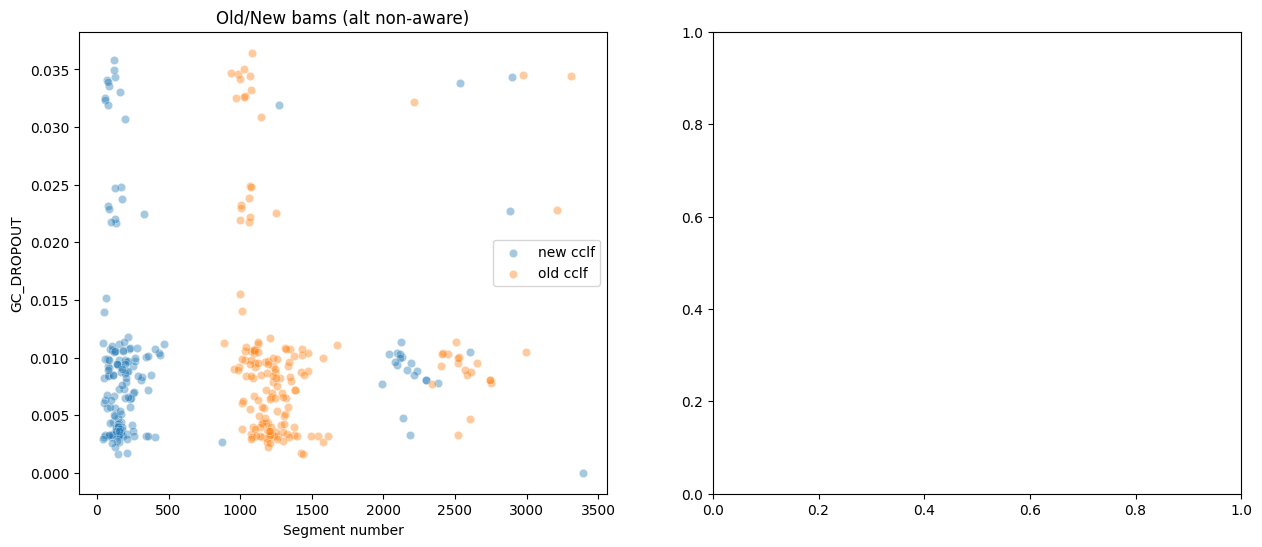

In [151]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.scatterplot(x=0, y='GC_DROPOUT', 
                data=pd.concat([pd.DataFrame(newclf_seg_num), gc_new.loc[newclf_seg_num.index, 'GC_DROPOUT']], axis=1),
                ax=ax[0], alpha=0.4, label='new cclf')
ax[0].set_title("New bams (alt aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("GC_DROPOUT")


sns.scatterplot(x=0, y='GC_DROPOUT', 
                data=pd.concat([pd.DataFrame(clf_seg_num).loc[lib_index, :], gc_old.loc[lib_index, :]], axis=1),
                ax=ax[0], alpha=0.4, label='old cclf')
ax[0].set_title("Old/New bams (alt non-aware)")
ax[0].set_xlabel("Segment number")
ax[0].set_ylabel("GC_DROPOUT")
# ax[0].set_xlim(0, 3500)